# Resnet18 Model
- Using Pre-Trained Model, we can get 100% Accuracy

In [1]:
import fastai 
print(fastai.__version__)
import matplotlib 
from fastai.vision.all import *
# from fastai.vision.data import ImageBlock, CategoryBlock, parent_label, show_images
# from fastai.vision.augment import Resize
from fastai.metrics import accuracy, F1Score
matplotlib.rc('image', cmap='Greys')
from pathlib import Path
from fastai.data.all import *
# from fastai.data.block import DataBlock
# from fastai.data.transforms import RandomSplitter, get_image_files, first

from fastai.learner import Learner 
from fastai.interpret import ClassificationInterpretation

import numpy as np
import torch.nn as nn
import torch

2.7.15


## Same Loading as `lung_simple.ipynb`

In [2]:
dset = 'lung' # 'lung' or 'colon'
path = (Path('../')/f'lung_colon_image_set/{dset}_image_sets')
Path.BASE_PATH = path
path.ls()

image_res = 256 # 256x256
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(image_res))

dls = db.dataloaders(path, bs=32)

## Define resnet18 model and fine tune for 5 epochs
- 100% Accuracy!

In [8]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, F1Score(average='macro')])
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.165122,0.076111,0.971000,0.971017,01:55


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.056653,0.025589,0.990333,0.990336,01:56
1,0.037658,0.008205,0.997000,0.997008,01:57
2,0.016733,0.006263,0.997667,0.997670,01:57
3,0.005230,0.001932,0.999333,0.999334,01:58
4,0.002579,0.000761,1.000000,1.000000,01:57


## Summary of Model Architecture

In [9]:
learn.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

## Show Results

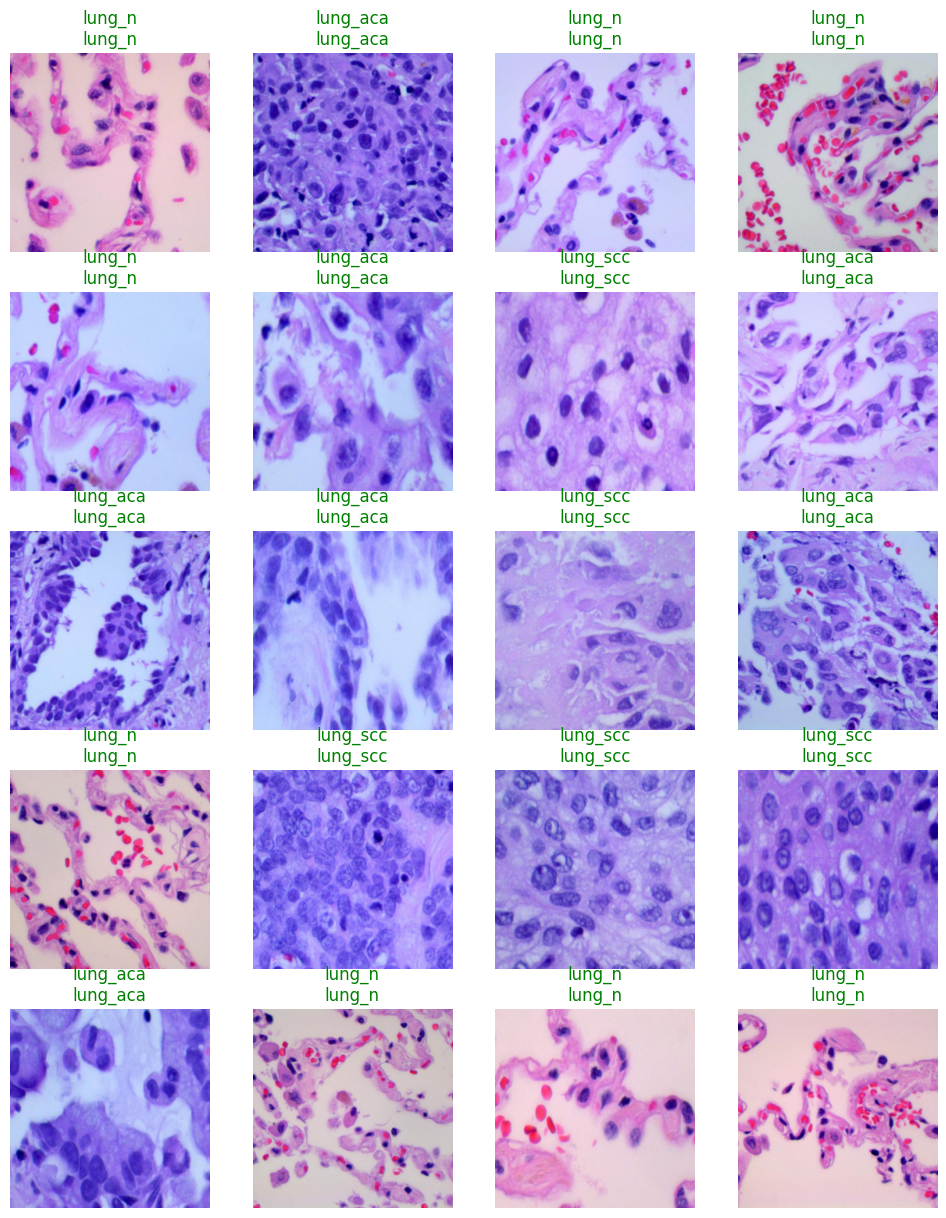

In [10]:
learn.show_results(max_n=20, nrows=5)

## Confusion Matrix

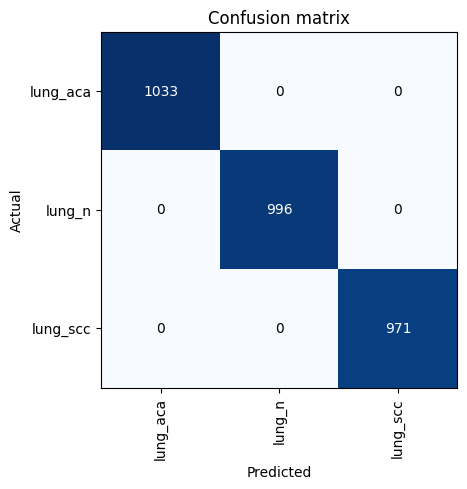

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Top Losses

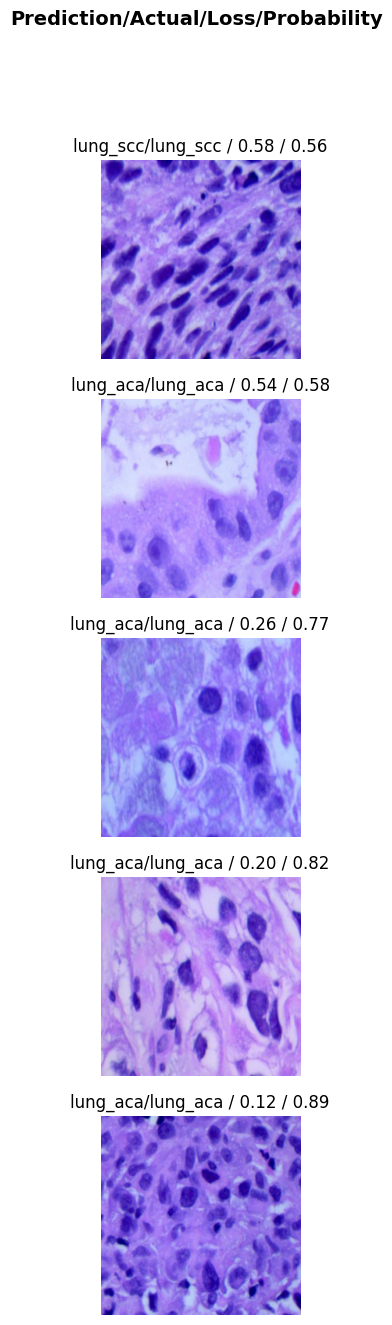

In [12]:
interp.plot_top_losses(5, nrows=5)